In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dateutil
import seaborn as sns
import time
import ast

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import metrics
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv("results_data_videos.csv")
print(df.shape)
df.head()

(2698, 11)


,categoryId,channelId,channelTitle,commentCount,dislikeCount,likeCount,publishAt,subs,tags,title,viewCount
0,20,UC-2wnBgTMRwgwkAkHq4V2rg,ProsafiaGaming,5919,53215,219456,2017-12-09T18:59:53Z,3390000,"['Newer Super Mario Bros Wii', 'New Super Mari...",Newer Super Mario Bros Wii - All Castles (2 Pl...,117295385
1,20,UC-2wnBgTMRwgwkAkHq4V2rg,ProsafiaGaming,733,4468,24597,2020-07-13T13:54:13Z,3390000,"['Newer Super Mario Bros Wii', 'New Super Mari...",New Super Mario Bros Wii - Top 5 Final Boss Hacks,5154308
2,20,UC-2wnBgTMRwgwkAkHq4V2rg,ProsafiaGaming,226,1346,8163,2020-07-09T13:24:44Z,3390000,"['New Super Mario Bros', 'Nintendo', 'Switch',...",New Super Mario Bros Series - All Power-Ups,2032062
3,20,UCfsEZNanT8pKishHomWNO9A,Pii89,5427,6018,61410,2014-05-04T21:02:26Z,36000,"['Gameplay', 'walkthrough', 'playthrough', 'le...",Super Mario Bros. (1985) Full Walkthrough NES ...,10576407
4,20,UCNPjDnjjIl3YUVUzz2Xdv3Q,SirloinPlayBox,210,1044,5584,2020-10-27T15:00:09Z,105000,"['mario bros wii', 'new super mario bros wii',...",Can Mario Jump Over 999 Item Blocks in New Sup...,1075049


In [30]:
def to_date(record):
    date = dateutil.parser.parse(record).date()
    return time.mktime(date.timetuple())

In [31]:
df["publishAt"] = df["publishAt"].apply(to_date)
df.corr()

,categoryId,commentCount,dislikeCount,likeCount,publishAt,subs,viewCount
categoryId,1.000000,-0.068000,0.001707,-0.054057,0.128679,0.046127,-0.037569
commentCount,-0.068000,1.000000,0.208865,0.508028,-0.131672,0.289498,0.356567
dislikeCount,0.001707,0.208865,1.000000,0.660038,-0.122029,0.226414,0.866911
likeCount,-0.054057,0.508028,0.660038,1.000000,-0.149006,0.403004,0.711528
publishAt,0.128679,-0.131672,-0.122029,-0.149006,1.000000,-0.027693,-0.209337
subs,0.046127,0.289498,0.226414,0.403004,-0.027693,1.000000,0.233334
viewCount,-0.037569,0.356567,0.866911,0.711528,-0.209337,0.233334,1.000000


In [32]:
print(np.where(df['commentCount'] > 30000))
print(np.where(df['dislikeCount'] > 15000))
print(np.where(df['likeCount'] > 300000))
print(np.where(df['viewCount'] > 20000000))
print(np.where(df['viewCount'] < 5000))

(array([  36,   92,  117,  438,  536,  592,  617,  938, 1036, 1092, 1117,
       1438, 2144, 2170, 2351, 2355, 2387, 2388, 2399, 2441, 2526, 2527,
       2550, 2570, 2617, 2623], dtype=int64),)
(array([   0,   17,   18,   42,   87,  110,  111,  119,  139,  159,  165,
        185,  206,  214,  219,  235,  296,  311,  317,  494,  500,  517,
        518,  542,  587,  610,  611,  619,  639,  659,  665,  685,  706,
        714,  719,  735,  796,  811,  817,  994, 1000, 1017, 1018, 1042,
       1087, 1110, 1111, 1119, 1139, 1159, 1165, 1185, 1206, 1214, 1219,
       1235, 1296, 1311, 1317, 1494, 1502, 1512, 1544, 1568, 1581, 1734,
       1735, 1745, 1857, 1970, 2004, 2006, 2052, 2148, 2197, 2203, 2355,
       2387, 2388, 2399, 2440, 2441, 2526, 2528, 2551, 2649], dtype=int64),)
(array([  18,   36,   87,   92,  185,  296,  317,  408,  438,  518,  536,
        587,  592,  685,  796,  817,  908,  938, 1018, 1036, 1087, 1092,
       1185, 1296, 1317, 1408, 1438, 1581, 1606, 1710, 1720, 1857, 186

In [33]:
df.drop([88,  331,  581,  832,  923, 1079, 1083, 1085, 1146, 1285, 1364,
       1473, 1556, 1560, 1572, 1575, 1586, 1644, 1686, 1710, 1716, 1794,
       1823, 1867, 88,  146,  165,  176,  231,  750,  764,  776,  783,  792,  796,
        827,  832,  841,  863,  865,  888,  907,  915,  919,  929,  934,
        957, 1003, 1032, 1152, 1194, 1230, 1285, 1292, 1345, 1348, 1349,
       1473, 1488, 1502, 1556, 1560, 1586, 1644, 1647, 1769, 1822, 1825,
       1867, 88,  118,  165,  331,  434,  477,  581,  684,  727,  764,  832,
        841,  957, 1049, 1052, 1079, 1085, 1146, 1152, 1194, 1230, 1285,
       1345, 1560, 1586, 1644, 1647, 1686, 1710, 1716, 1769, 1786, 116,  123,  146,  165,  176,  196,  231,  375,  379,  625,  629,
        750,  764,  776,  783,  792,  796,  827,  832,  841,  853,  863,
        888,  899,  907,  915,  919,  929,  934,  938,  957,  969, 1003,
       1032, 1146, 1152, 1194, 1219, 1230, 1285, 1292, 1345, 1473, 1488,
       1502, 1560, 1586, 1644, 1716, 1769, 1822, 28,   35,   58,   83,   85,   93,  101,  104,  132,  137,  141,
        164,  184,  185,  217,  226,  235,  238,  253,  256,  258,  279,
        287,  290,  295,  302,  312,  343,  401,  416,  423,  432,  450,
        451,  455,  503,  506,  508,  529,  537,  540,  545,  552,  562,
        593,  651,  666,  673,  682,  700,  701,  705,  797,  819,  820,
        829,  830,  845,  891,  893,  921,  926,  940,  976,  988,  991,
       1005, 1015, 1018, 1019, 1056, 1058, 1066, 1071, 1109, 1124, 1150,
       1178, 1202, 1212, 1213, 1218, 1227, 1232, 1233, 1236, 1239, 1241,
       1243, 1245, 1250, 1261, 1263, 1271, 1272, 1273, 1276, 1277, 1278,
       1280, 1281, 1282, 1286, 1287, 1288, 1289, 1294, 1295, 1296, 1297,
       1301, 1302, 1304, 1305, 1313, 1315, 1317, 1318, 1319, 1322, 1323,
       1324, 1326, 1328, 1330, 1331, 1333, 1334, 1336, 1337, 1340, 1343,
       1346, 1352, 1415, 1424, 1430, 1439, 1461, 1472, 1476, 1489, 1521,
       1577, 1598, 1629, 1664, 1681, 1720, 1821, 1834, 1836, 1845, 1853,
       1872, 1885, 1887], inplace = True)

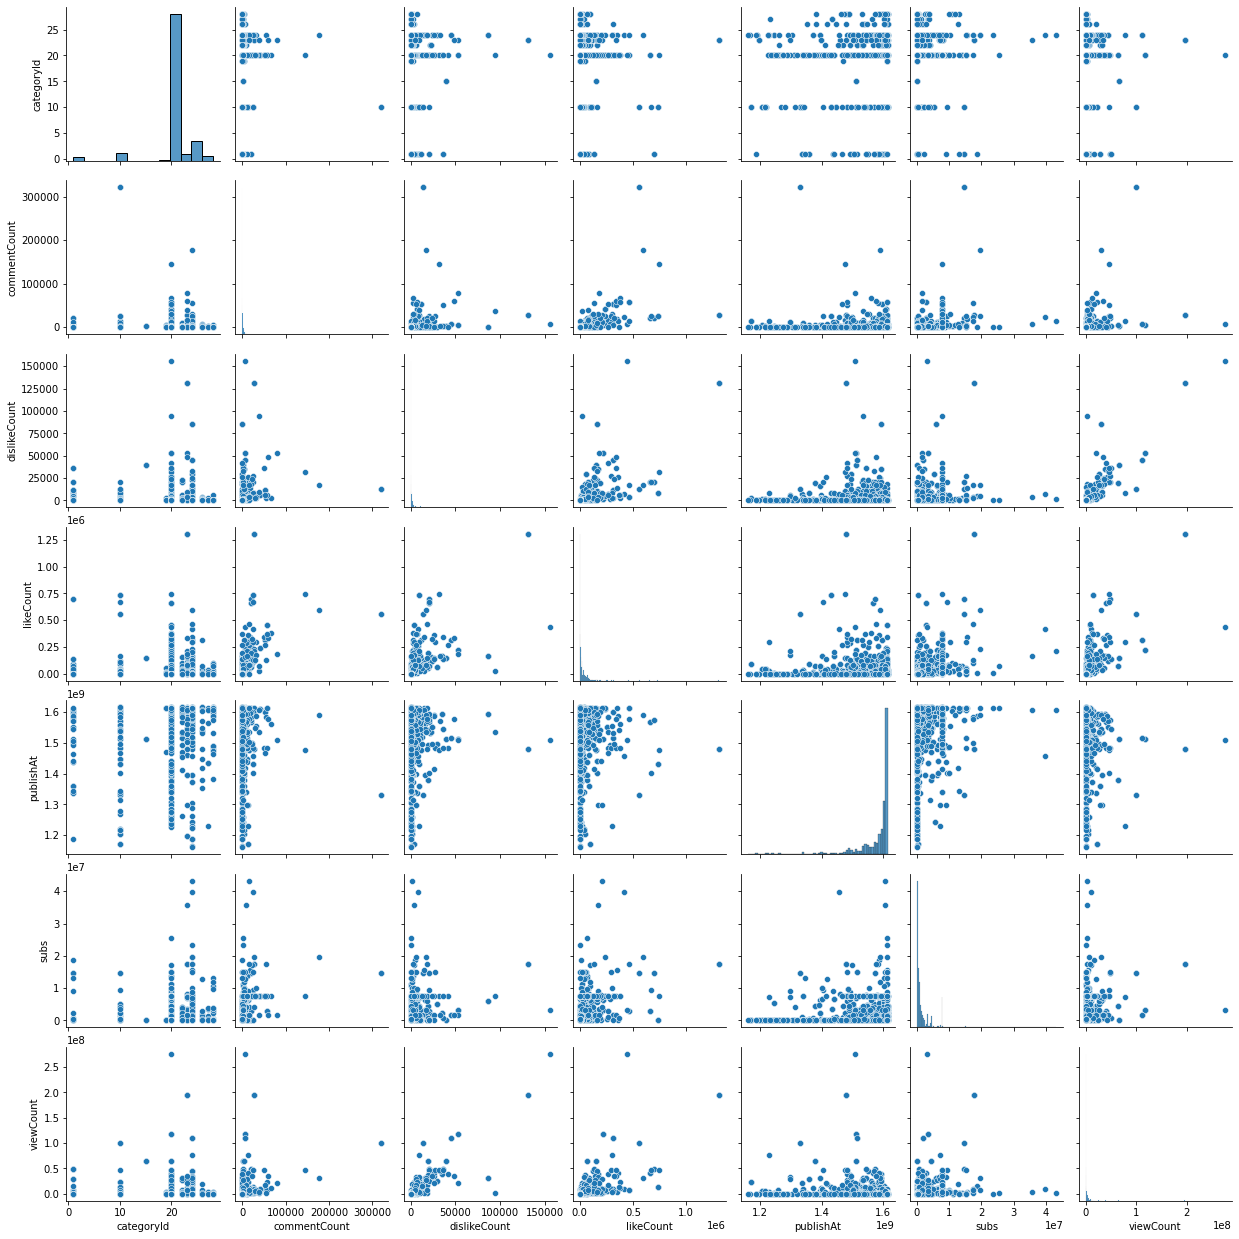

In [34]:
sns.pairplot(df)

In [35]:
X = df.drop(columns=["viewCount", "channelId", "categoryId", "likeCount"])
y = df["viewCount"]

In [36]:
def to_list(record):
    return record.replace('[', '').replace(']', '').split(',')

X["tags"] = X["tags"].apply(to_list)

mlb = MultiLabelBinarizer(sparse_output=True)
X = X.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(X["tags"]),
        index=X.index,
        columns=mlb.classes_
    )
)
X = X.drop(columns=["tags"])

In [37]:
def title_to_list(record):
    return record.split(' ')

X["title"] = X["title"].apply(title_to_list)

mlb = MultiLabelBinarizer(sparse_output=True)
X = X.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(X["title"]),
        index=X.index,
        columns=mlb.classes_
    )
)
X = X.drop(columns=["title"])

temp_columns = X.pop("channelTitle")
X = X[X.columns[X.sum()>90]]
X.insert(1, "channelTitle", temp_columns)


In [38]:
X.head(1)

,commentCount,channelTitle,dislikeCount,publishAt,subs,'100%','Bowser','Luigi','Mario Kart','Mario',...,Switch,The,Trailer,U,Walkthrough,Wii,World,in,of,|
0,5919,ProsafiaGaming,53215,1.512788e+09,3390000,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [39]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X.tolist(), y, test_size=0.2)

In [41]:
regressor = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
regressor.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = regressor.predict(X_test)

In [43]:
regressor.score(X_test, y_test)

0.18038789647436226

In [44]:
predictions = np.absolute(y_pred.round(decimals = 0))
df_pred = pd.DataFrame({'Real':y_test, 'Predicción':predictions})
df_pred.head(30)

,Real,Predicción
787,49948,66948.0
2321,293136,3837288.0
660,4733978,3425939.0
1,5154308,6137727.0
1942,24015,415419.0
1608,13639,444069.0
956,781538,430207.0
2263,2095,430946.0
892,7428777,7046272.0
2504,1624492,813649.0


In [45]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Score is:', r2_score(y_test, y_pred))

Mean Absolute Error: 1820248.0322855192
Mean Squared Error: 67705564032952.18
Root Mean Squared Error: 8228339.081063212
R Squared Score is: 0.18038789647436226
